In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

digits = datasets.load_digits()
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y=pd.get_dummies(digits.target).values
print(y[0])
print(X.shape)

[ True False False False False False False False False False]
(1797, 64)


In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)
X_train.shape
#Defining the model 
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Input((64,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(Adam(learning_rate=0.001),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,986 (74.16 KB)

 Trainable params: 18,986 (74.16 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.2)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2395 - loss: 4.0413 - val_accuracy: 0.7326 - val_loss: 0.9386
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8282 - loss: 0.6801 - val_accuracy: 0.8646 - val_loss: 0.3907
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9056 - loss: 0.3067 - val_accuracy: 0.9132 - val_loss: 0.2738
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9673 - loss: 0.1632 - val_accuracy: 0.9653 - val_loss: 0.1885
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9777 - loss: 0.1172 - val_accuracy: 0.9688 - val_loss: 0.1574
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9820 - loss: 0.0836 - val_accuracy: 0.9757 - val_loss: 0.1306
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9904 - loss: 0.0599 - val_accuracy: 0.9549 - val_loss: 0.1391
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9910 - loss: 0.0548 - val_accuracy: 0.9757 - val_loss:

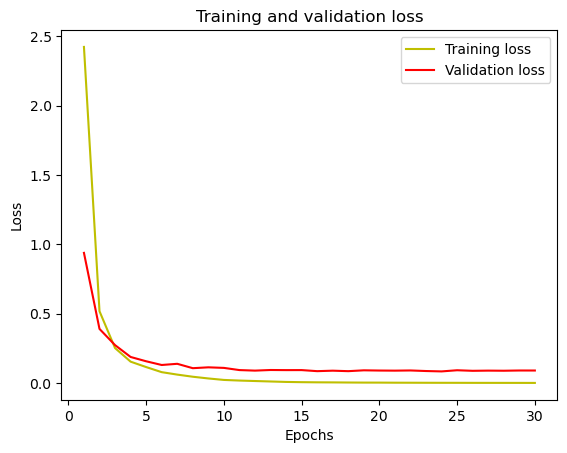

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [5]:

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.98      1.00      0.99        45
           2       1.00      1.00      1.00        36
           3       1.00      0.95      0.97        37
           4       0.97      1.00      0.99        36
           5       1.00      0.97      0.98        32
           6       0.97      0.97      0.97        38
           7       1.00      1.00      1.00        38
           8       0.94      1.00      0.97        32
           9       1.00      1.00      1.00        30

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

[[35  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  2  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 31  1  0  0  0]
 [ 0  1  0  0  0  0 37  0  0  0]
 [ 0  0  0